<span style='font-family:serif'>
    
# <center>$Machine   Learning   From   Scratch$</center>
    
# <center><span style='background:yellow'> Redes Neurais</span></center>
<center>$Rafael Pavan$</center>



<span style='font-family:serif'>
    
## 1. Introdução

A Rede Neural Artificial é um dos métodos mais populares e promissores na área de Aprendizado de Máquina. Com o objetivo inicial de imitar o funcionamento do cérebro, o método surgiu na década de 40 e perdeu popularidade devido às limitações computacionais. Mais tarde, na década de 80, as redes neurais artificiais voltaram a se popularizar, mostrando seu grande poder de aprendizado. Neste problema iremos realizar o reconhecimento de dígitos.

<span style='font-family:serif'>
    
## 2. Importando e Pré-Visualizando os Dados


Primeiro, vamos carregar os dados do arquivo.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv', sep=',', index_col=None)

In [5]:
X = df.iloc[:, 0:-1].values 

Y = df.iloc[:, -1].values 

print('X:', X[0:5,:])

print('Y:', Y[0:5])

print('\nDimensao de X: ', X.shape)

print('\nDimensao de Y: ', Y.shape)

print('\nClasses do problema: ', np.unique(Y))

X: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Y: [10 10 10 10 10]

Dimensao de X:  (4999, 400)

Dimensao de Y:  (4999,)

Classes do problema:  [ 1  2  3  4  5  6  7  8  9 10]


Vamos plotar aleatoriamente 100 amostras da base de dados.

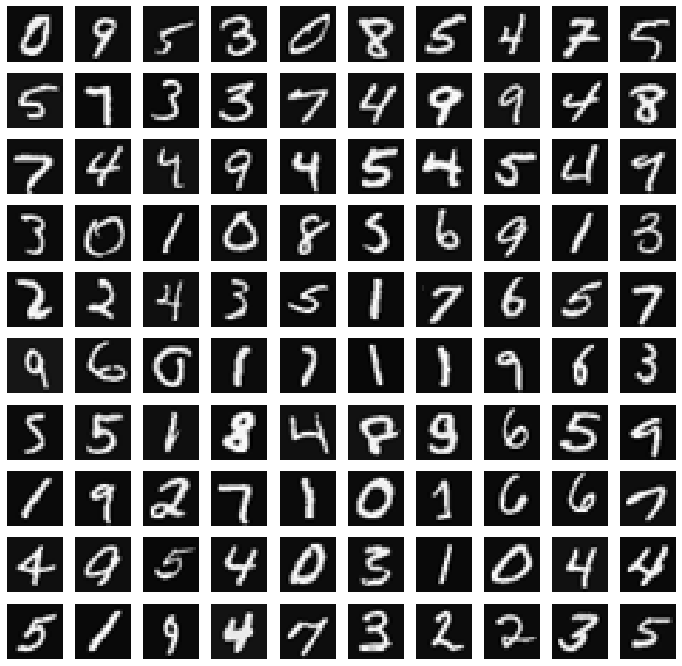

In [8]:
def visualizaDados(X):
    
    width = int(round(np.sqrt(X.shape[1])) )
    m, n = X.shape
    height = int(n / width)
    rows = int(np.floor(np.sqrt(m)))
    cols = int(np.ceil(m / rows))
    
    fig, axs = plt.subplots(rows,cols, figsize=(12, 12))
                        
    for ax, i in zip(axs.ravel(), range( X.shape[0] )):
    
        novo_X = np.reshape( np.ravel(X[i,:]), (width, height) )

        ax.imshow(novo_X.T, cmap='gray'); 
        ax.axis('off')
    
    plt.show()

idx_perm = np.random.permutation( range(X.shape[0]) )
visualizaDados( X[idx_perm[0:100],:] )

Agora, vamos carregar os pesos pré-treinados para a rede neural e inicializar os parâmetros mais importantes.

In [13]:
input_layer_size  = 400  
hidden_layer_size = 25   
num_labels = 10            

theta1 = pd.read_csv('Theta1.csv', sep=',', header=None).values

theta2 = pd.read_csv('Theta2.csv', sep=',', header=None).values

nn_params = np.concatenate([np.ravel(theta1), np.ravel(theta2)])


<span style='font-family:serif'>
    
## 3. Calcular o Custo (Feedforward)

A função de custo (sem regularização) é descrita a seguir.

$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[-y_k^{(i)} \log\left( \left(h_\Theta(x^{(i)})\right)_k \right) - \left(1 - y_k^{(i)}\right) \log \left( 1 - \left(h_\Theta(x^{(i)} )\right)_k \right)\right]$$

Antes de implementar a função de custo, vamos implementar a função sigmoidal.

In [15]:
def sigmoid(z):
    """
    Calcula a função sigmoidal  
    """

    z = 1/(1+np.exp(-z))
    
    return z

z = sigmoid(10)
print(z)


z = sigmoid(0)
print(z)

0.9999546021312976
0.5


In [17]:
def funcaoCusto(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    
    '''
    
    Calcula o custo da rede neural com tres camadas
    voltada para tarefa de classificacao.

    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.

    Parametros
    ----------   
    nn_params : vetor com os pesos da rede neural
    input_layer_size : tamanho da camada de entrada
    hidden_layer_size : tamanho da camada oculta
    num_labels : numero de classes possiveis
    X : matriz com os dados de treinamento
    y : vetor com as classes dos dados de treinamento
    
    Retorno
    -------
    J: valor do custo
    
    '''

    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    m = X.shape[0]
         
  
    J = 0;
    
    X1 = np.column_stack((np.ones(m),X))
    c1 = sigmoid(np.dot(X1,Theta1.T))
    c11 = np.column_stack((np.ones(c1.shape[0]),c1))
    c2 = sigmoid(np.dot(c11,Theta2.T))
    classes=np.unique(y)
        
    for posicao in range(num_labels) :
        yprov = np.copy(y)
        yprov[yprov!=[classes[posicao]]] = 0
        yprov[yprov==[classes[posicao]]] = 1
        J = J + (1 / m) * ((np.dot(-yprov,np.log(c2[:,posicao])))-np.dot((1 - yprov),np.log(1 - c2[:,posicao])))

    return J

J = funcaoCusto(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y)

print('Custo com os parametros (carregados do arquivo): %1.6f ' %J)

Custo com os parametros (carregados do arquivo): 0.287680 


<span style='font-family:serif'>
    
## 4. Regularização
    
A função de custo com regularização é descrita a seguir.

$$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m}\sum_{k=1}^{K} \left[-y_k^{(i)} \log\left( \left(h_\Theta(x^{(i)})\right)_k \right) - \left(1 - y_k^{(i)}\right) \log \left( 1 - \left(h_\Theta(x^{(i)} )\right)_k \right)\right]$$

$$ + \frac{\lambda}{2m} \left[\sum_{j=1}^{25} \sum_{k=1}^{400} \left(\Theta^{(1)}_{j,k}\right)^2 + \sum_{j=1}^{10} \sum_{k=1}^{25} \left(\Theta^{(2)}_{j,k}\right)^2\right]$$



A seguir, complete a nova função de custo aplicando regularização.

In [19]:
def funcaoCusto_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, vLambda):
    '''
    Calcula o custo da rede neural com tres camadas
    voltada para tarefa de classificacao.

    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.

    Parametros
    ----------   
    nn_params : vetor com os pesos da rede neural
    input_layer_size : tamanho da camada de entrada
    hidden_layer_size : tamanho da camada oculta
    num_labels : numero de classes possiveis
    X : matriz com os dados de treinamento
    y : vetor com as classes dos dados de treinamento
    vLambda: parametro de regularizacao
    
    Retorno
    -------
    J: valor do custo
    
    '''

    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    m = X.shape[0]
         
    J = 0;
    
  
    X = np.column_stack((np.ones(m),X))
    c1 = sigmoid(np.dot(X,Theta1.T))
    c1 = np.column_stack((np.ones(c1.shape[0]),c1))
    c2 = sigmoid(np.dot(c1,Theta2.T))
    classes=np.unique(y)
        
    for posicao in range(num_labels) :
        yprov = np.copy(y)
        yprov[yprov!=[classes[posicao]]] = 0
        yprov[yprov==[classes[posicao]]] = 1
        J = J + (1 / m) * ((np.dot(-yprov,np.log(c2[:,posicao])))-np.dot((1 - yprov),np.log(1 - c2[:,posicao])))    
    
    Theta1 = Theta1[:,1:]
    Theta2 = Theta2[:,1:]
    
    reg=(vLambda/(2*m))*((np.sum(Theta1*Theta1)+np.sum(Theta2*Theta2)))
    
    J = J + reg
    
  
    return J


vLambda = 1;

J = funcaoCusto_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda)

print('Custo com os parametros (carregados do arquivo): %1.6f ' %J)


Custo com os parametros (carregados do arquivo): 0.383840 


<span style='font-family:serif'>
    
## 5. Inicializando os Parâmetros
    
Nesta parte, começa a implementação das duas camadas da rede neural para classificação dos dígitos manuscritos. Os pesos são inicializados aleatoriamente. Mas, para que toda a execução gere o mesmo resultado, vamos usar uma semente para a função de geração de números aleatórios.



In [20]:
def inicializaPesosAleatorios(L_in, L_out, randomSeed = None):
    '''
    Inicializa aleatoriamente os pesos de uma camada usando 
    L_in (conexoes de entrada) e L_out (conexoes de saida).

    W sera definido como uma matriz de dimensoes [L_out, 1 + L_in]
    visto que devera armazenar os termos para "bias".
    
    randomSeed: indica a semente para o gerador aleatorio
    '''

    epsilon_init = 0.12
    
    # se for fornecida uma semente para o gerador aleatorio
    if randomSeed is not None:
        W = np.random.RandomState(randomSeed).rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        
    # se nao for fornecida uma semente para o gerador aleatorio
    else:
        W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init
        
    return W


initial_Theta1 = inicializaPesosAleatorios(input_layer_size, hidden_layer_size, randomSeed = 10)
initial_Theta2 = inicializaPesosAleatorios(hidden_layer_size, num_labels, randomSeed = 20)

initial_rna_params = np.concatenate([np.ravel(initial_Theta1), np.ravel(initial_Theta2)])



<span style='font-family:serif'>
    
## 6. Backpropagation

O *backpropagation* é responsável por calcular o gradiente para a função de custo da rede neural. O gradiente da sigmóide pode ser calculado utilizando a equação:

$$ g'(z) = \frac{d}{dz}g(z) = g(z)(1-g(z)), $$

sendo que

$$ g(z) = \frac{1}{1 + e^{-z}}. $$


In [22]:
def sigmoidGradient(z):
    '''
    Retorna o gradiente da funcao sigmoidal para z 
    
    Calcula o gradiente da funcao sigmoidal
    para z. A funcao deve funcionar independente se z for matriz ou vetor.
    Nestes casos,  o gradiente deve ser calculado para cada elemento.
    '''
    
    g = np.zeros(z.shape)
   
    
    g = sigmoid(z)*(1-sigmoid(z))
    
    
    
    return g

g = sigmoidGradient(np.array([1,-0.5, 0, 0.5, 1]))
print(g)


[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [23]:
def funcaoCusto_backp(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y):
    '''
    Calcula o custo e gradiente da rede neural com tres camadas
    voltada para tarefa de classificacao.

    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    Parametros
    ----------   
    nn_params : vetor com os pesos da rede neural
    input_layer_size : tamanho da camada de entrada
    hidden_layer_size : tamanho da camada oculta
    num_labels : numero de classes possiveis
    X : matriz com os dados de treinamento
    y : vetor com as classes dos dados de treinamento
    
    Retorno
    -------
    J: valor do custo
    
    grad: vetor que contem todas as derivadas parciais
          da rede neural.
    '''

    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    m = X.shape[0]
         
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    X = np.column_stack((np.ones(m),X))
    c2 = sigmoid(np.dot(X,Theta1.T))
    z2=np.column_stack((np.ones(c2.shape[0]),np.dot(X,Theta1.T)))
    c2 = np.column_stack((np.ones(c2.shape[0]),c2))
    c3 = sigmoid(np.dot(c2,Theta2.T))
    classes=np.unique(y)
    delta3=np.zeros(c3.shape)
    delta2=np.zeros(c2.shape)
    
    for posicao in range(num_labels) :
        yprov = np.copy(y)
        yprov[yprov!=[classes[posicao]]] = 0
        yprov[yprov==[classes[posicao]]] = 1
        J = J + (1 / m) * ((np.dot(-yprov,np.log(c3[:,posicao])))-np.dot((1 - yprov),np.log(1 - c3[:,posicao])))
        delta3[:,posicao] = c3[:,posicao]-yprov
        
    delta2 = np.dot(delta3,Theta2)*sigmoidGradient(z2)
    Theta1_grad = Theta1_grad + np.dot(delta2[:,1:].T,X)/m
    Theta2_grad = Theta2_grad + np.dot(delta3.T,c2)/m

    # Junta os gradientes
    grad = np.concatenate([np.ravel(Theta1_grad), np.ravel(Theta2_grad)])

    return J, grad



from utils import verificaGradiente
verificaGradiente(funcaoCusto_backp)

[[-5.83749959e-03 -5.83749960e-03]
 [ 1.91855660e-04  1.91855662e-04]
 [ 2.88536057e-04  2.88536059e-04]
 [ 1.19937733e-04  1.19937734e-04]
 [ 1.10886523e-03  1.10886523e-03]
 [ 1.92791902e-04  1.92791905e-04]
 [ 2.26314494e-04  2.26314494e-04]
 [ 5.17645815e-05  5.17645809e-05]
 [ 7.04407392e-03  7.04407392e-03]
 [ 1.68013492e-05  1.68013496e-05]
 [-4.36398406e-05 -4.36398419e-05]
 [-6.39587650e-05 -6.39587639e-05]
 [ 6.50253501e-03  6.50253502e-03]
 [-1.75220283e-04 -1.75220283e-04]
 [-2.74227216e-04 -2.74227218e-04]
 [-1.21110912e-04 -1.21110914e-04]
 [-1.80236581e-05 -1.80236579e-05]
 [-2.05507789e-04 -2.05507786e-04]
 [-2.51845522e-04 -2.51845523e-04]
 [-6.66376487e-05 -6.66376473e-05]
 [-4.90652278e-01 -4.90652278e-01]
 [-2.55739592e-01 -2.55739592e-01]
 [-2.33774046e-01 -2.33774046e-01]
 [-2.50018880e-01 -2.50018880e-01]
 [-2.50750071e-01 -2.50750071e-01]
 [-2.33549608e-01 -2.33549608e-01]
 [ 1.08133003e-01  1.08133003e-01]
 [ 5.61633717e-02  5.61633717e-02]
 [ 5.19510542e-02  5

<span style='font-family:serif'>
    
## 7. Regularização
$$ D^{(l)}_{ij} = \frac{1}{m}\Delta^{(l)}_{ij} + \frac{\lambda}{m}\Theta^{(l)}_{ij} $$

<br/>
<br/>


In [24]:
def funcaoCusto_backp_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, vLambda):
    '''
    Calcula o custo e gradiente da rede neural com tres camadas
    voltada para tarefa de classificacao.

    Os parametros da rede neural sao colocados no vetor nn_params
    e precisam ser transformados de volta nas matrizes de peso.
    
    Parametros
    ----------   
    nn_params : vetor com os pesos da rede neural
    input_layer_size : tamanho da camada de entrada
    hidden_layer_size : tamanho da camada oculta
    num_labels : numero de classes possiveis
    X : matriz com os dados de treinamento
    y : vetor com as classes dos dados de treinamento
    vLambda: parametro de regularizacao
    
    Retorno
    -------
    J: valor do custo
    
    grad: vetor que contem todas as derivadas parciais
          da rede neural.
    '''

    # Extrai os parametros de nn_params e alimenta as variaveis Theta1 e Theta2.
    Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
    Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

    # Qtde de amostras
    m = X.shape[0]
         
    # As variaveis a seguir precisam ser retornadas corretamente
    J = 0;
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    
    X = np.column_stack((np.ones(m),X))
    c2 = sigmoid(np.dot(X,Theta1.T))
    z2 = np.column_stack((np.ones(c2.shape[0]),np.dot(X,Theta1.T)))
    c2 = np.column_stack((np.ones(c2.shape[0]),c2))
    c3 = sigmoid(np.dot(c2,Theta2.T))
    classes=np.unique(y)
    delta3=np.zeros(c3.shape)
    delta2=np.zeros(c2.shape)
    
    for posicao in range(num_labels) :
        yprov = np.copy(y)
        yprov[yprov!=[classes[posicao]]] = 0
        yprov[yprov==[classes[posicao]]] = 1
        J = J + (1 / m) * ((np.dot(-yprov,np.log(c3[:,posicao])))-np.dot((1 - yprov),np.log(1 - c3[:,posicao])))
        delta3[:,posicao] = c3[:,posicao]-yprov
        
    delta2 = np.dot(delta3,Theta2)*sigmoidGradient(z2)
    Theta1_grad = Theta1_grad + np.dot(delta2[:,1:].T,X)/m
    Theta2_grad = Theta2_grad + np.dot(delta3.T,c2)/m
    Theta1j = Theta1[:,1:]
    Theta2j = Theta2[:,1:]
    
    reg=(vLambda/(2*m))*((np.sum(Theta1j*Theta1j)+np.sum(Theta2j*Theta2j)))
    
    J = J + reg

    Theta1_grad[:,1:] = Theta1_grad[:,1:] + (vLambda/m)*Theta1[:,1:]
    Theta2_grad[:,1:] = Theta2_grad[:,1:] + (vLambda/m)*Theta2[:,1:]
    grad = np.concatenate([np.ravel(Theta1_grad), np.ravel(Theta2_grad)])

    return J, grad

vLambda = 3;

from utils import verificaGradiente
verificaGradiente(funcaoCusto_backp_reg, vLambda=vLambda)

J, grad = funcaoCusto_backp_reg(nn_params, input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda)

[[-5.83749959e-03 -5.83749960e-03]
 [ 5.47497013e-02  5.47497013e-02]
 [ 8.75573654e-03  8.75573654e-03]
 [-4.52882120e-02 -4.52882120e-02]
 [ 1.10886523e-03  1.10886523e-03]
 [-1.65721380e-02 -1.65721380e-02]
 [ 3.96455104e-02  3.96455104e-02]
 [ 5.94132594e-02  5.94132594e-02]
 [ 7.04407392e-03  7.04407392e-03]
 [-3.26244653e-02 -3.26244653e-02]
 [-6.00430522e-02 -6.00430522e-02]
 [-3.22583338e-02 -3.22583338e-02]
 [ 6.50253501e-03  6.50253502e-03]
 [ 5.92612211e-02  5.92612211e-02]
 [ 3.87430432e-02  3.87430432e-02]
 [-1.73953099e-02 -1.73953099e-02]
 [-1.80236581e-05 -1.80236579e-05]
 [-4.52647426e-02 -4.52647426e-02]
 [ 8.74078706e-03  8.74078706e-03]
 [ 5.47100774e-02  5.47100774e-02]
 [-4.90652278e-01 -4.90652278e-01]
 [-2.01181747e-01 -2.01181747e-01]
 [-2.25306846e-01 -2.25306846e-01]
 [-2.95427029e-01 -2.95427029e-01]
 [-3.08285528e-01 -3.08285528e-01]
 [-2.50314538e-01 -2.50314538e-01]
 [ 1.08133003e-01  1.08133003e-01]
 [ 1.15524867e-01  1.15524867e-01]
 [ 7.66781633e-02  7

<span style='font-family:serif'>
    
## 8. Minimizando a Função de Custo com o Scypy
    
Neste ponto, todo o código necessário para treinar a rede está pronto.
Aqui, será utilizada a funcao `minimize` do ScyPy para treinar as funções de custo
de forma eficiente utilizando os gradientes calculados.

In [25]:
import scipy
import scipy.optimize

MaxIter = 500

vLambda = 1

result = scipy.optimize.minimize(fun=funcaoCusto_backp_reg, x0=initial_rna_params, args=(input_layer_size, hidden_layer_size, num_labels, X, Y, vLambda),  
                    method='TNC', jac=True, options={'maxiter': MaxIter})

nn_params = result.x

Theta1 = np.reshape( nn_params[0:hidden_layer_size*(input_layer_size + 1)], (hidden_layer_size, input_layer_size+1) )
Theta2 = np.reshape( nn_params[ hidden_layer_size*(input_layer_size + 1):], (num_labels, hidden_layer_size+1) )

print(result)

     fun: 0.31639327174241383
     jac: array([ 4.09672150e-05, -3.74561883e-08,  1.93773402e-08, ...,
       -2.13908755e-05, -2.35012492e-06, -1.74466142e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 500
     nit: 27
  status: 3
 success: False
       x: array([-9.49294623e-01, -1.87243485e-04,  9.68673236e-05, ...,
        3.09127145e-02,  2.27380735e+00,  1.34788790e+00])


<span style='font-family:serif'>
    
## 9. Predição
 

In [28]:
def predicao(Theta1, Theta2, X):
   
    '''
    Prediz o rotulo de X ao utilizar
    os pesos treinados na rede neural (Theta1, Theta2)
    '''
    
    m = X.shape[0] # número de amostras
    num_labels = Theta2.shape[0]
    
    p = np.zeros(m)

    a1 = np.hstack( [np.ones([m,1]),X] )
    h1 = sigmoid( np.dot(a1,Theta1.T) )

    a2 = np.hstack( [np.ones([m,1]),h1] ) 
    h2 = sigmoid( np.dot(a2,Theta2.T) )
    
    p = np.argmax(h2,axis=1)
    p = p+1
    
    return p
    

pred = predicao(Theta1, Theta2, X)

print('\nAcuracia no conjunto de treinamento: %f\n'%( np.mean( pred == Y ) * 100) )



Acuracia no conjunto de treinamento: 99.599920

